In [1]:
# Imports
#---------
import sys
import pandas as pd
import numpy as np
import feather
import os
import gc
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter, MonthLocator
import matplotlib as mpl

register_matplotlib_converters()

# File locations
#----------------
the_gases = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/raw/2oxaria/json/gap_filling/536_method'
pngs = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/pngs/gap_filling/'


In [2]:
# Load the df 
#-------------

oxaria2_pm = pd.read_feather(the_gases+'oxaria2_pm_gf.ftr').set_index(['tag','rec']).sort_index()


In [40]:
oxaria2_pm.head()

val.mtf1  val.pm1  val.mtf5  val.pm2p5  \
tag         rec                                                                 
scs-bgx-500 2020-03-09 10:25:14+00:00      27.0      1.0      32.0        2.2   
            2020-03-09 10:25:24+00:00      26.0      1.1      32.0        3.5   
            2020-03-09 10:25:34+00:00      28.0      1.1      33.0        3.0   
            2020-03-09 10:25:44+00:00      26.0      1.1      36.0        3.3   
            2020-03-09 10:25:54+00:00      26.0      1.0      42.0        2.7   

                                       val.bin:0  val.bin:1  val.bin:2  \
tag         rec                                                          
scs-bgx-500 2020-03-09 10:25:14+00:00       75.0       48.0       20.0   
            2020-03-09 10:25:24+00:00       85.0       43.0       30.0   
            2020-03-09 10:25:34+00:00       78.0       51.0       20.0   
            2020-03-09 10:25:44+00:00       80.0       40.0       25.0   
            2020-03-09 10:25:54+00:00       71.0       33.0       24.0   

                                       val.bin:3  val.bin:4  val.bin:5  ...  \
tag         rec                                                         ...   
scs-bgx-500 2020-03-09 10:25:14+00:00        4.0        4.0        3.0  ...   
            2020-03-09 10:25:24+00:00        8.0        5.0        1.0  ...   
            2020-03-09 10:25:34+00:00        7.0        7.0        2.0  ...   
            2020-03-09 10:25:44+00:00        2.0       10.0        6.0  ...   
            2020-03-09 10:25:54+00:00        6.0        9.0        2.0  ...   

                                       val.mtf7  val.per  val.sfr  \
tag         rec                                                     
scs-bgx-500 2020-03-09 10:25:14+00:00       0.0      4.9     4.48   
            2020-03-09 10:25:24+00:00      42.0      4.9     4.74   
            2020-03-09 10:25:34+00:00       0.0      4.9     4.60   
            2020-03-09 10:25:44+00:00       0.0      4.9     4.80   
            2020-03-09 10:25:54+00:00      36.0      4.9     4.92   

                                       val.sht.hmd  val.sht.tmp  src  \
tag         rec                                                        
scs-bgx-500 2020-03-09 10:25:14+00:00    40.700001    24.200001   N3   
            2020-03-09 10:25:24+00:00    40.200001    24.400000   N3   
            2020-03-09 10:25:34+00:00    39.599998    24.600000   N3   
            2020-03-09 10:25:44+00:00    39.200001    24.799999   N3   
            2020-03-09 10:25:54+00:00    38.700001    24.900000   N3   

                                       exg.islin/n3/vlgw.pm10  \
tag         rec                                                 
scs-bgx-500 2020-03-09 10:25:14+00:00                     NaN   
            2020-03-09 10:25:24+00:00                     NaN   
            2020-03-09 10:25:34+00:00                     NaN   
            2020-03-09 10:25:44+00:00                     NaN   
            2020-03-09 10:25:54+00:00                     NaN   

                                       exg.islin/n3/vlgw.pm1  \
tag         rec                                                
scs-bgx-500 2020-03-09 10:25:14+00:00                    NaN   
            2020-03-09 10:25:24+00:00                    NaN   
            2020-03-09 10:25:34+00:00                    NaN   
            2020-03-09 10:25:44+00:00                    NaN   
            2020-03-09 10:25:54+00:00                    NaN   

                                       exg.islin/n3/vlgw.pm2p5  \
tag         rec                                                  
scs-bgx-500 2020-03-09 10:25:14+00:00                      NaN   
            2020-03-09 10:25:24+00:00                      NaN   
            2020-03-09 10:25:34+00:00                      NaN   
            2020-03-09 10:25:44+00:00                      NaN   
            2020-03-09 10:25:54+00:00                      NaN   

                                         

In [3]:
# Let list of tags 
#------------------
devices = oxaria2_pm.index.get_level_values(0).unique()
devices

Index(['scs-bgx-550', 'scs-bgx-551', 'scs-bgx-552', 'scs-bgx-553',
       'scs-bgx-554', 'scs-bgx-555', 'scs-bgx-556', 'scs-bgx-557',
       'scs-bgx-558', 'scs-bgx-559'],
      dtype='object', name='tag')

In [4]:
oxaria2_pm['name'].unique()

array(['Windmill School', 'Said Business School', 'County Hall',
       'Divinity Road', 'Jahlul Bayt Mosque', 'St Peters', 'St Giles',
       'Warneford Hospital', 'Spare', 'Speedwell St'], dtype=object)

In [22]:
oxaria2_pm.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 25073064 entries, ('scs-bgx-550', Timestamp('2020-03-09 10:31:54+0000', tz='UTC')) to ('scs-bgx-559', Timestamp('2021-02-28 23:59:53+0000', tz='UTC'))
Data columns (total 40 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   val.mtf1                 float32
 1   val.pm1                  float32
 2   val.mtf5                 float32
 3   val.pm2p5                float32
 4   val.bin:0                float32
 5   val.bin:1                float32
 6   val.bin:2                float32
 7   val.bin:3                float32
 8   val.bin:4                float32
 9   val.bin:5                float32
 10  val.bin:6                float32
 11  val.bin:7                float32
 12  val.bin:8                float32
 13  val.bin:9                float32
 14  val.bin:10               float32
 15  val.bin:11               float32
 16  val.bin:12               float32
 17  val.bin:13               float32
 18  v

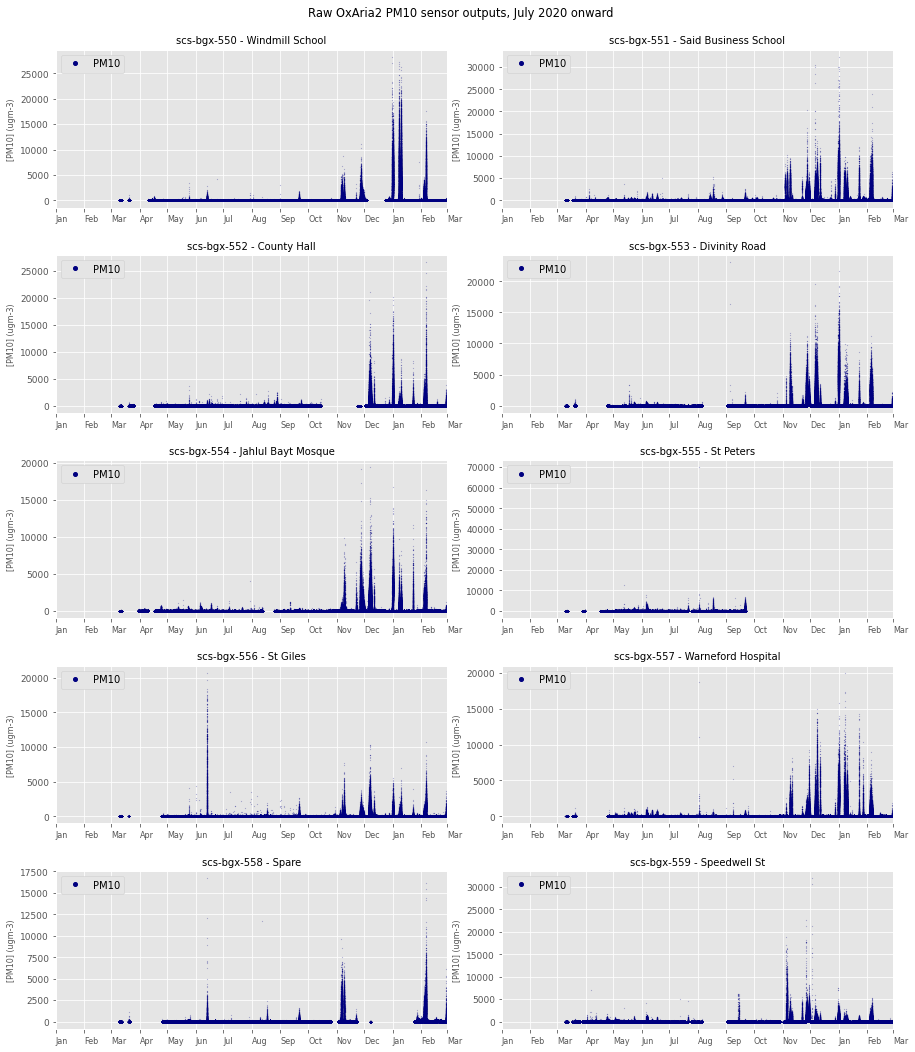

In [32]:
# Loop through plots with a log scale to compare time series & size fractions

df = oxaria2_pm.iloc[:,[29,39]]

plt.style.use('ggplot')
#plt.tight_layout()
myFmt = mdates.DateFormatter('%b')
start_date=dt.datetime(2020,1,1)
end_date=dt.datetime(2021,3,1)

fig, axes = plt.subplots(nrows=5, ncols=2, sharex=False, sharey=False, figsize=(15,20))
axes_list = [item for sublist in axes for item in sublist] 

fig.suptitle('Raw OxAria particle sensor observations Warneford Hospital, Oxford. October 2020 to March 2021.',
             fontsize=11.5,
             y=0.98)

for tag, dat in df.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0,inplace=True)
    t_name = list(dat['name'].unique())[0] 
    dat.plot(y='val.pm10', c='navy',linewidth=0.5, marker='o', ms=0.1, ls='', label='PM10', ax=ax, legend=True, \
            zorder=1)
    ax1.set_title(''.join(str(tag)+' - '+str(t_name)), fontsize=10)
    ax1.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
        )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', bottom=False)
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(myFmt)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='left')
    ax.set_xlim(start_date, end_date)
    ax.set_ylabel('[PM10] (ugm-3)', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.14, hspace=0.3)
    ax.legend(markerscale=40, frameon=True, framealpha=0.99, loc='upper left') 
    
plt.savefig(pngs+'oxaria2_pm10_raw_sensor_ts.png')
plt.show()    
    
for ax in axes_list:
    ax.remove()

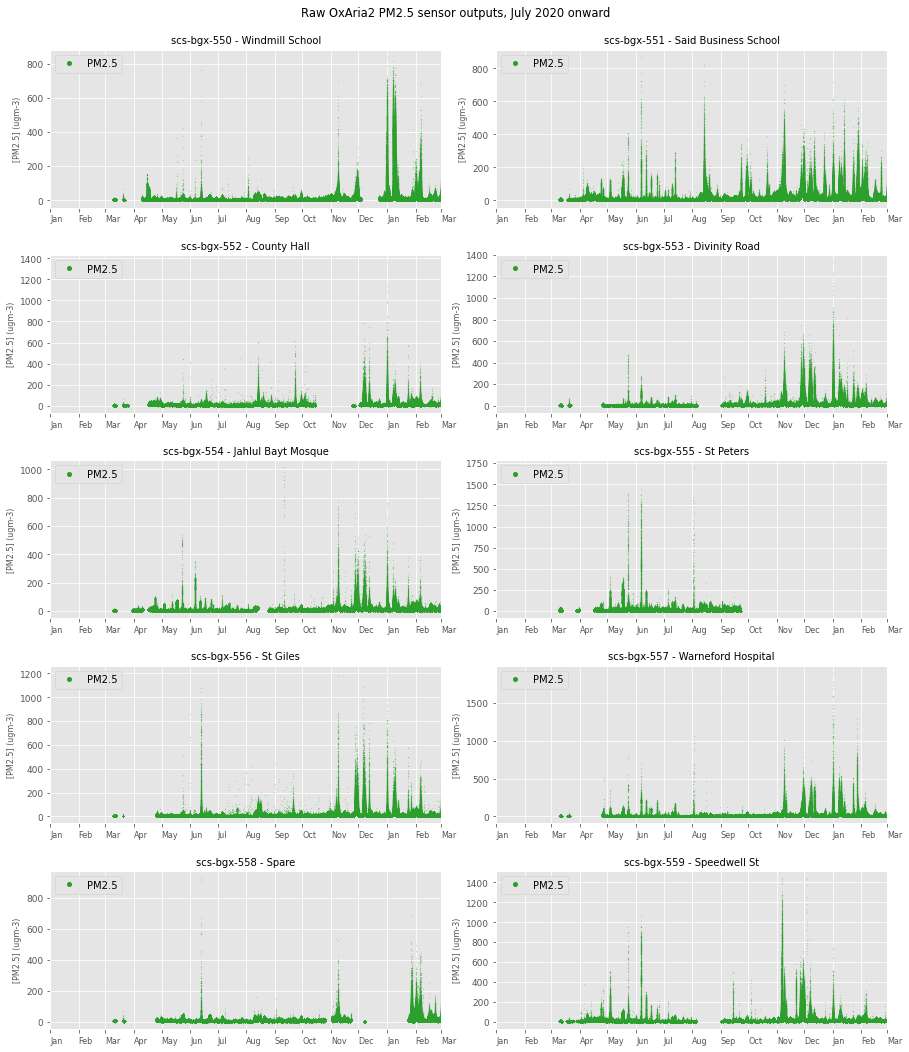

In [33]:
# Loop through plots with a log scale to compare time series & size fractions

df = oxaria2_pm.iloc[:,[3,39]]

plt.style.use('ggplot')
#plt.tight_layout()
myFmt = mdates.DateFormatter('%b')
start_date=dt.datetime(2020,1,1)
end_date=dt.datetime(2021,3,1)

fig, axes = plt.subplots(nrows=5, ncols=2, sharex=False, sharey=False, figsize=(15,20))
axes_list = [item for sublist in axes for item in sublist] 

fig.suptitle('Raw OxAria2 PM2.5 sensor outputs, July 2020 onward', fontsize=11.5, y=0.91)

for tag, dat in df.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0,inplace=True)
    t_name = list(dat['name'].unique())[0] 
    dat.plot(y='val.pm2p5', c='tab:green',linewidth=0.5, marker='o', ms=0.1, ls='', label='PM2.5', ax=ax, legend=True, \
            zorder=1)
    ax.set_title(''.join(tag+' - '+t_name), fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
        )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0)
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(myFmt)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='left')
    ax.set_xlim(start_date, end_date)
    ax.set_ylabel('[PM2.5] (ugm-3)', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.14, hspace=0.3)
    ax.legend(markerscale=40, frameon=True, framealpha=0.99, loc='upper left')

plt.savefig(pngs+'oxaria2_pm25_raw_sensor_ts.png')
plt.show()    
    
for ax in axes_list:
    ax.remove()


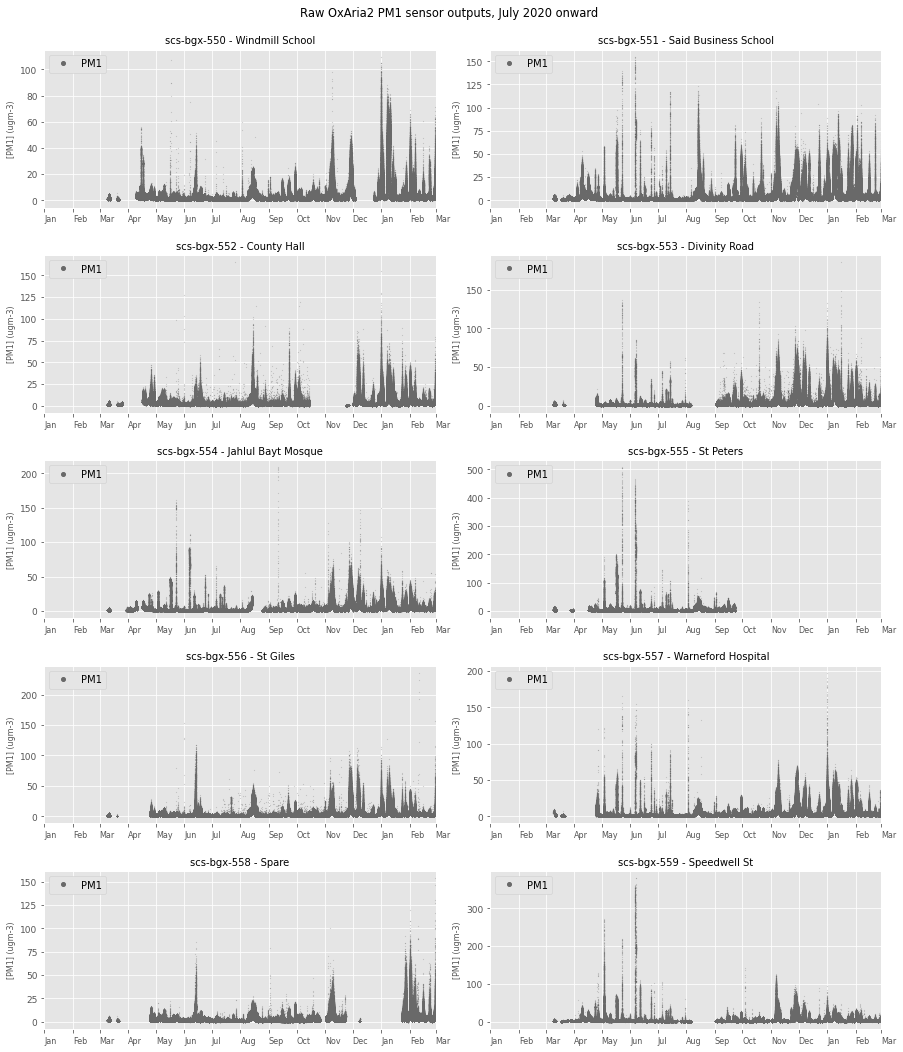

In [34]:
# Loop through plots with a log scale to compare time series & size fractions

df = oxaria2_pm.iloc[:,[1,39]]

plt.style.use('ggplot')
#plt.tight_layout()
myFmt = mdates.DateFormatter('%b')
start_date=dt.datetime(2020,1,1)
end_date=dt.datetime(2021,3,1)

fig, axes = plt.subplots(nrows=5, ncols=2, sharex=False, sharey=False, figsize=(15,20))
axes_list = [item for sublist in axes for item in sublist] 

fig.suptitle('Raw OxAria2 PM1 sensor outputs, July 2020 onward', fontsize=11.5, y=0.91)

for tag, dat in df.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0,inplace=True)
    t_name = list(dat['name'].unique())[0] 
    dat.plot(y='val.pm1', c='dimgrey',linewidth=0.5, marker='o', ms=0.1, ls='', label='PM1', ax=ax, legend=True, \
            zorder=1)
    ax.set_title(''.join(tag+' - '+t_name), fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
        )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0)
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(myFmt)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='left')
    ax.set_xlim(start_date, end_date)
    ax.set_ylabel('[PM1] (ugm-3)', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.14, hspace=0.3)
    ax.legend(markerscale=40, frameon=True, framealpha=0.99, loc='upper left')

plt.savefig(pngs+'oxaria2_pm1_raw_sensor_ts.png')
plt.show()    
    
for ax in axes_list:
    ax.remove()


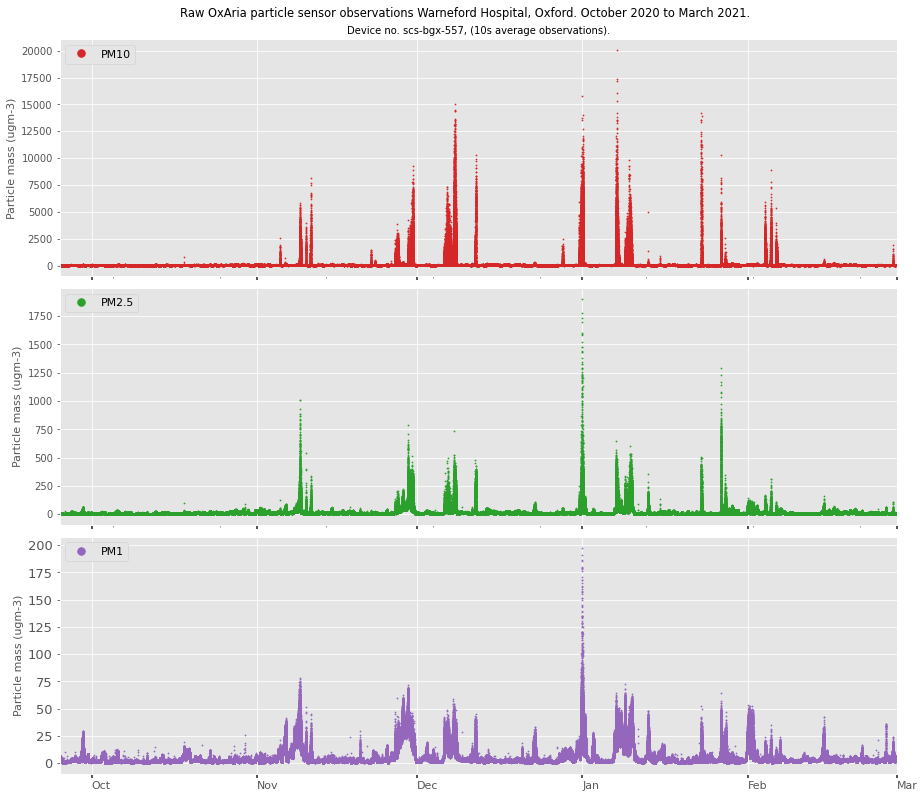

In [30]:
# Loop through plots with a log scale to compare time series & size fractions

df = oxaria2_pm.query('tag == "scs-bgx-557"').reset_index()

plt.style.use('ggplot')
#plt.tight_layout()
myFmt = mdates.DateFormatter('%b')
start_date=dt.datetime(2020,9,25)
end_date=dt.datetime(2021,3,1)

fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=False, figsize=(15,15))
#axes_list = [item for sublist in axes for item in sublist] 

fig.suptitle('Raw OxAria particle sensor observations Warneford Hospital, Oxford. October 2020 to March 2021.',
             fontsize=11.5,
             y=0.91)

#for tag, dat in df.groupby('tag'):
#    ax = axes_list.pop(0)
#    dat.reset_index(level=0,inplace=True)
t_name = list(df['name'].unique())[0] 
df.plot(x='rec',y='val.pm10', c='tab:red',linewidth=0.5, marker='o', ms=0.75, ls='', label='PM10', ax=ax1, legend=True, \
        zorder=1)
df.plot(x='rec',y='val.pm2p5', c='tab:green',linewidth=0.5, marker='o', ms=0.75, ls='', label='PM2.5', ax=ax2, legend=True, \
        zorder=1)
df.plot(x='rec',y='val.pm1', c='tab:purple',linewidth=0.5, marker='o', ms=0.75, ls='', label='PM1', ax=ax3, legend=True, \
        zorder=1)
ax1.set_title(''.join('Device no. ' + df['tag'].unique() + ', (10s average observations).'), fontsize=10)
plt.tick_params(
    axis='x',
    which='major',
    labelrotation=0,
    labelsize=11,
    width=1
    )
plt.tick_params(axis='y', labelsize=13)
plt.tick_params(axis='x', which='minor', length=0)
ax1.tick_params(axis='x', which='major', width=2)
ax2.tick_params(axis='x', which='major', width=2)
ax3.tick_params(axis='x', which='major', width=2)
ax3.xaxis.set_major_locator(MonthLocator())
ax3.xaxis.set_major_formatter(myFmt)
plt.setp(ax3.xaxis.get_majorticklabels(), ha='left')
plt.xlim(start_date, end_date)
ax1.set_ylabel('Particle mass (ugm-3)', fontsize=11)
ax2.set_ylabel('Particle mass (ugm-3)', fontsize=11)
ax3.set_ylabel('Particle mass (ugm-3)', fontsize=11)
plt.xlabel('')
plt.subplots_adjust(wspace=0.14, hspace=0.05)
ax1.legend(markerscale=10, frameon=True, framealpha=0.99, loc='upper left', fontsize=11)
ax2.legend(markerscale=10, frameon=True, framealpha=0.99, loc='upper left', fontsize=11)
ax3.legend(markerscale=10, frameon=True, framealpha=0.99, loc='upper left', fontsize=11)

plt.savefig(pngs+'pm_warneford_suzanne.png')
plt.show()    
    
#for ax in axes_list:
#    ax.remove()


In [37]:
df.loc[:,['val.pm10','val.pm2p5','val.pm1']].describe().to_csv(pngs+'warneford_pm_summary.csv')